In [56]:
import pandas as pd
import numpy as np

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [ ]:
# Load CSV 
data_path = "/Users/yuvaraj/GUVI CLASSESS/Content Monetization Modeler/youtube_ad_revenue_dataset.csv"

df = pd.read_csv(data_path)

df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [58]:
# View shape and first few rows
print("Shape of dataset:", df.shape)


Shape of dataset: (122400, 12)


In [59]:
df.isnull().sum()


video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [60]:
# Overview of dataset
df.info()

# Quick statistical summary for numeric columns
df.describe()

# Check missing values (%)
missing = df.isnull().mean() * 100
print("Missing values (%):")
print(missing[missing > 0].sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB
Missing values (%):
likes                 4.997549
comments              4.993464
watch_time_minut

In [61]:
print("Before removing duplicates:", df.shape)


Before removing duplicates: (122400, 12)


In [62]:
print("Rows:", len(df))
print("Missing values after cleaning:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())


Rows: 122400
Missing values after cleaning: 18334
Duplicates: 2400


In [63]:
# Count duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

# Remove duplicates if any
if duplicate_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("✅ Duplicates removed!")



Duplicate rows: 2400
✅ Duplicates removed!


In [64]:
# Convert column names to lowercase and replace spaces with underscores
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print(df.columns.tolist())


['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category', 'device', 'country', 'ad_revenue_usd']


In [65]:
# Identify missing value %
missing = df.isnull().mean() * 100
print(missing[missing > 0].sort_values(ascending=False))



likes                 5.0
comments              5.0
watch_time_minutes    5.0
dtype: float64


In [70]:

# fill numeric columns with median, categorical with mode
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled")


Missing values handled


In [71]:
# Convert date column to datetime if it exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [68]:
print("Rows:", len(df))
print("Missing values after cleaning:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())


Rows: 120000
Missing values after cleaning: 0
Duplicates: 0


In [69]:
print("After removing duplicates:", df.shape)

After removing duplicates: (120000, 12)


In [42]:
# Save cleaned data
clean_path = "/Users/yuvaraj/GUVI CLASSESS/Content Monetization Modeler/youtube_Cleaned.csv"
df.to_csv(clean_path, index=False)

print("✅ Cleaned dataset saved successfully at:", clean_path)


✅ Cleaned dataset saved successfully at: /Users/yuvaraj/GUVI CLASSESS/Content Monetization Modeler/youtube_Cleaned.csv


In [43]:
# General summary of numeric columns
df.describe()

# Correlation matrix
corr = df.corr(numeric_only=True)
corr['ad_revenue_usd'].sort_values(ascending=False)


ad_revenue_usd          1.000000
watch_time_minutes      0.964052
engagement_rate         0.145552
likes                   0.142571
views                   0.037942
comments                0.033630
subscribers             0.005065
video_length_minutes    0.000364
Name: ad_revenue_usd, dtype: float64

In [ ]:
####Exploratory Data Analysis (EDA)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("/Users/yuvaraj/GUVI CLASSESS/Content Monetization Modeler/youtube_Cleaned.csv")


In [73]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              120000 non-null  object 
 1   date                  120000 non-null  object 
 2   views                 120000 non-null  int64  
 3   likes                 120000 non-null  float64
 4   comments              120000 non-null  float64
 5   watch_time_minutes    120000 non-null  float64
 6   video_length_minutes  120000 non-null  float64
 7   subscribers           120000 non-null  int64  
 8   category              120000 non-null  object 
 9   device                120000 non-null  object 
 10  country               120000 non-null  object 
 11  ad_revenue_usd        120000 non-null  float64
 12  engagement_rate       120000 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 11.9+ MB


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,engagement_rate
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,9999.832333,1099.705792,274.332350,37539.823485,16.017910,502291.970050,252.711361,0.137410
std,99.918405,506.372185,126.461529,12658.957710,8.084928,288364.967705,61.954125,0.052160
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603,0.025492
25%,9933.000000,673.000000,168.000000,26949.914101,9.005928,252641.500000,199.892158,0.094965
50%,10000.000000,1102.000000,274.000000,37522.221205,16.009269,503633.500000,252.678607,0.137501
75%,10067.000000,1524.000000,381.000000,48209.880123,23.026064,752386.250000,305.613497,0.179921
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254,0.249554


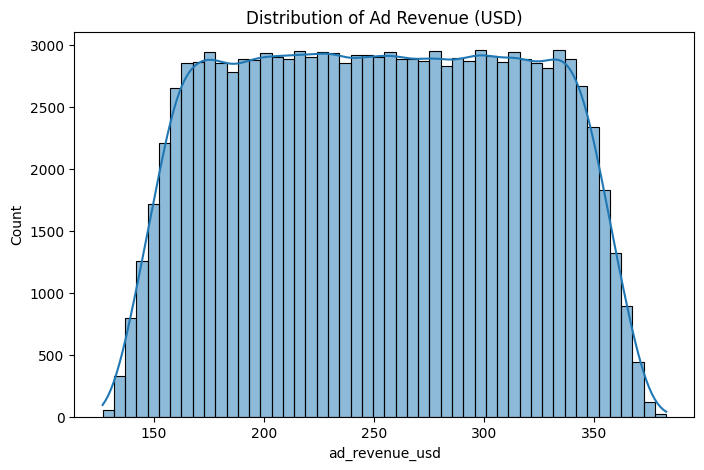

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['ad_revenue_usd'], bins=50, kde=True)
plt.title("Distribution of Ad Revenue (USD)")
plt.show()

#how most videos make small revenue, and a few make a lot (that’s normal)


In [ ]:
corr = df.corr(numeric_only=True)
corr['ad_revenue_usd'].sort_values(ascending=False)

#Correlation with Revenue & Heatmap


ad_revenue_usd          1.000000
watch_time_minutes      0.964052
engagement_rate         0.145552
likes                   0.142571
views                   0.037942
comments                0.033630
subscribers             0.005065
video_length_minutes    0.000364
Name: ad_revenue_usd, dtype: float64

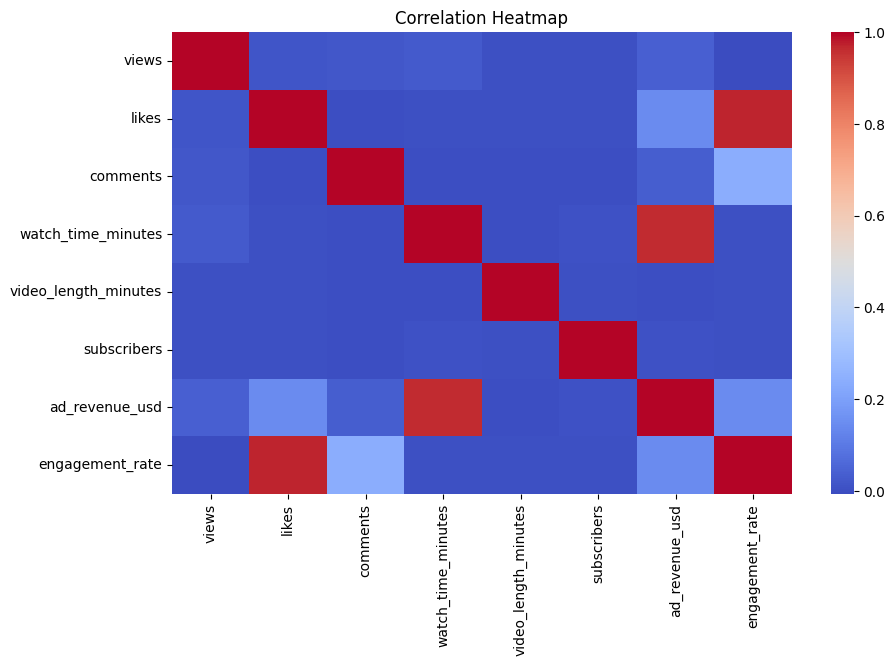

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


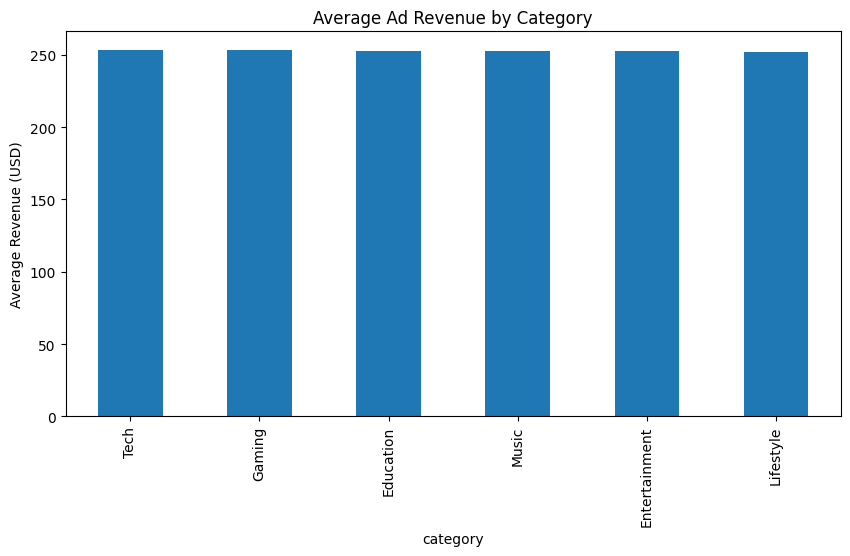

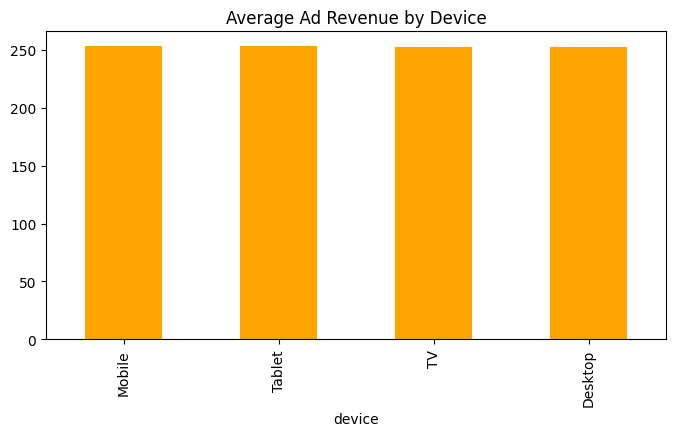

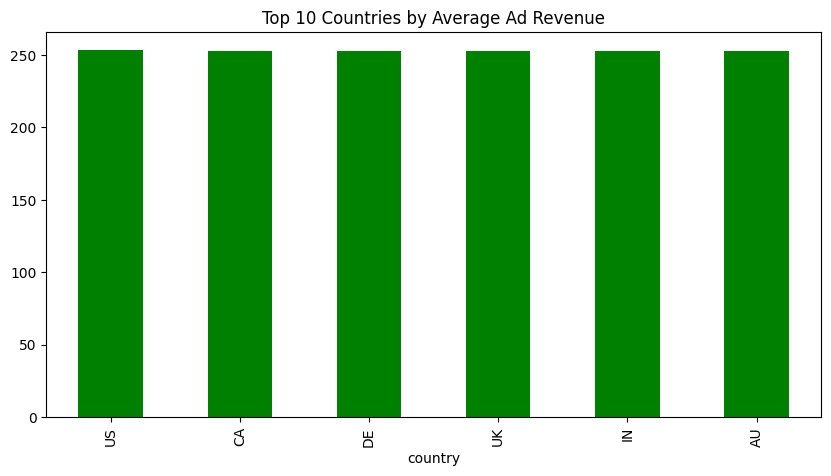

In [78]:
#Average Revenue by Category / Country / Device
plt.figure(figsize=(10,5))
df.groupby('category')['ad_revenue_usd'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Ad Revenue by Category")
plt.ylabel("Average Revenue (USD)")
plt.show()

plt.figure(figsize=(8,4))
df.groupby('device')['ad_revenue_usd'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Average Ad Revenue by Device")
plt.show()

plt.figure(figsize=(10,5))
df.groupby('country')['ad_revenue_usd'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title("Top 10 Countries by Average Ad Revenue")
plt.show()


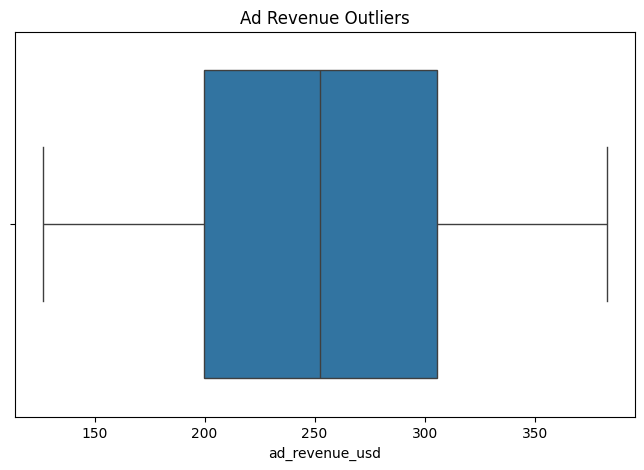

In [79]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['ad_revenue_usd'])
plt.title("Ad Revenue Outliers")
plt.show()


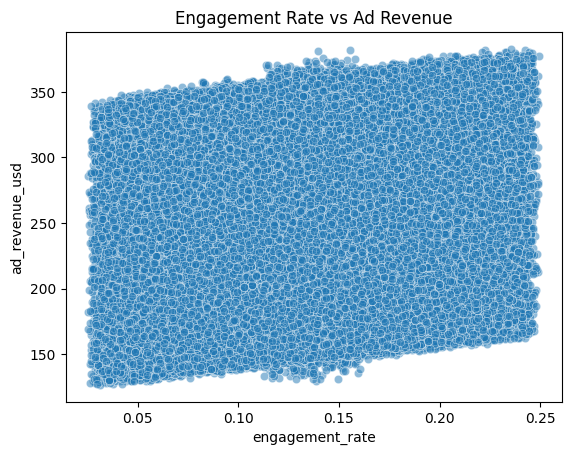

In [ ]:
#Engagement Rate (for insight)

df['engagement_rate'] = (df['likes'] + df['comments']) / (df['views'] + 1)
sns.scatterplot(x='engagement_rate', y='ad_revenue_usd', data=df, alpha=0.5)
plt.title("Engagement Rate vs Ad Revenue")
plt.show()


In [81]:
##Feature Engineering. 

#instead of just “likes” or “views”, I can create “likes per view” or “engagement rate”.

#Videos with higher engagement rate usually earn higher ad revenue


In [ ]:
# Avoid division by zero 

df['engagement_rate'] = (df['likes'] + df['comments']) / (df['views'] + 1)
df['likes_per_view'] = df['likes'] / (df['views'] + 1)
df['comments_per_view'] = df['comments'] / (df['views'] + 1)

df[['engagement_rate', 'likes_per_view', 'comments_per_view']].head()


,engagement_rate,likes_per_view,comments_per_view
0,0.155077,0.122874,0.032203
1,0.098622,0.064085,0.034538
2,0.214498,0.195979,0.018519
3,0.142800,0.118685,0.024116
4,0.236097,0.187867,0.048231


In [83]:
df['watch_time_per_view'] = df['watch_time_minutes'] / (df['views'] + 1)
df['length_ratio'] = df['watch_time_minutes'] / (df['video_length_minutes'] + 1)

#how much of a video people actually watch (engagement depth)


In [ ]:
df['revenue_per_subscriber'] = df['ad_revenue_usd'] / (df['subscribers'] + 1)

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
##


In [86]:
drop_cols = ['video_id', 'date']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])


In [ ]:
df.to_csv("/Users/yuvaraj/GUVI CLASSESS/Content Monetization Modeler/youtube_engineered.csv", index=False)
print("✅ Feature-engineered dataset saved successfully!")



✅ Feature-engineered dataset saved successfully!


In [88]:
import pandas as pd

df = pd.read_csv("/Users/yuvaraj/GUVI CLASSESS/Content Monetization Modeler/youtube_engineered.csv")
df.head()


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,likes_per_view,comments_per_view,watch_time_per_view,length_ratio,revenue_per_subscriber,month,day_of_week
0,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155077,0.122874,0.032203,2.666520,6860.765669,0.000891,9,1
1,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098622,0.064085,0.034538,1.518242,614.831646,0.000191,9,6
2,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214498,0.195979,0.018519,5.677625,2107.769228,0.001497,11,3
3,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,0.142800,0.118685,0.024116,3.122523,2453.694859,0.000517,1,1
4,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,0.236097,0.187867,0.048231,1.583991,2051.593275,0.003938,4,0


In [ ]:
#Identify Categorical and Numeric Columns

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", list(categorical_cols))
print("Numeric Columns:", list(numeric_cols))


Categorical Columns: ['category', 'device', 'country']
Numeric Columns: ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd', 'engagement_rate', 'likes_per_view', 'comments_per_view', 'watch_time_per_view', 'length_ratio', 'revenue_per_subscriber', 'month', 'day_of_week']


In [91]:
!pip install scikit-learn



  Using cached scikit_learn-1.7.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp311-cp311-macosx_12_0_arm64.whl (8.6 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 3.9 MB/s  0:00:05 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [ ]:
#One-Hot Encoding + Scaling

from sklearn.preprocessing import OneHotEncoder #One-Hot Encoding + Scaling

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded data with numeric columns
df_encoded = pd.concat([df[numeric_cols].reset_index(drop=True), encoded_df], axis=1)


In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled, columns=df_encoded.columns)


In [ ]:
X = df_scaled.drop('ad_revenue_usd', axis=1)
y = df_scaled['ad_revenue_usd']

# Train-Test Split (Split the dataset into training data (to teach the model) and testing data (to check model performance).



In [ ]:
# Step 1 — Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Step 2 — Load Engineered Dataset
df = pd.read_csv("/Users/yuvaraj/GUVI CLASSESS/Content Monetization Modeler/youtube_engineered.csv")

# Step 3 — Encode Categorical Columns
for col in ['category', 'device', 'country']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 4 — Separate Features and Target
X = df.drop('ad_revenue_usd', axis=1)
y = df['ad_revenue_usd']

# Step 5 — Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Step 6 — Initialize and Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7 — Predict on Test Set
y_pred = model.predict(X_test)

# Step 8 — Evaluate Model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # sqrt for RMSE
mae = mean_absolute_error(y_test, y_pred)

print("\n✅ Linear Regression trained successfully!")
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

#ML model used: Linear Regression (scikit-learn)
# Type: Regression (predicts continuous values)
#Use reason: Predict numeric ad revenue, interpret feature importance, simple & fast.


Training set size: (96000, 17)
Test set size: (24000, 17)

✅ Linear Regression trained successfully!
R2 Score: 0.9525845546321897
RMSE: 13.478542384057516
MAE: 3.1045455124958297


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# --- Load Dataset ---
df = pd.read_csv("/Users/yuvaraj/GUVI CLASSESS/Content Monetization Modeler/youtube_engineered.csv")

# --- Encode categorical columns ---
for col in ['category', 'device', 'country']:
    df[col] = LabelEncoder().fit_transform(df[col])

# --- Drop unused columns ---
columns_to_drop = ['month', 'day_of_week', 'revenue_per_subscriber']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# --- Features & Target ---
X = df.drop('ad_revenue_usd', axis=1)
y = df['ad_revenue_usd']

# --- Train Linear Regression ---
model = LinearRegression()
model.fit(X, y)

st.title("🎥 YouTube Ad Revenue Predictor & Insights")

# --- Main two columns: left=input, right=charts ---
left_col, right_col = st.columns([1,2])  # make right column wider

# --- Left Column: Inputs + Prediction ---
with left_col:
    st.header("Input Video Stats")
    views = st.number_input("Number of Views", min_value=0)
    likes = st.number_input("Number of Likes", min_value=0)
    comments = st.number_input("Number of Comments", min_value=0)
    watch_time = st.number_input("Watch Time (minutes)", min_value=0.0)
    video_length = st.number_input("Video Length (minutes)", min_value=0.0)
    subscribers = st.number_input("Channel Subscribers", min_value=0)
    category_input = st.selectbox("Category", df['category'].unique())
    device_input = st.selectbox("Device", df['device'].unique())
    country_input = st.selectbox("Country", df['country'].unique())

    # Feature Engineering
    engagement_rate = (likes + comments) / (views + 1)
    likes_per_view = likes / (views + 1)
    comments_per_view = comments / (views + 1)
    watch_time_per_view = watch_time / (views + 1)
    length_ratio = watch_time / (video_length + 1)

    # Encode categorical inputs
    le_category = LabelEncoder().fit(df['category'])
    le_device = LabelEncoder().fit(df['device'])
    le_country = LabelEncoder().fit(df['country'])

    category_encoded = le_category.transform([category_input])[0]
    device_encoded = le_device.transform([device_input])[0]
    country_encoded = le_country.transform([country_input])[0]

    # Prepare input DataFrame
    input_df = pd.DataFrame({
        'views': [views],
        'likes': [likes],
        'comments': [comments],
        'watch_time_minutes': [watch_time],
        'video_length_minutes': [video_length],
        'subscribers': [subscribers],
        'engagement_rate': [engagement_rate],
        'likes_per_view': [likes_per_view],
        'comments_per_view': [comments_per_view],
        'watch_time_per_view': [watch_time_per_view],
        'length_ratio': [length_ratio],
        'category': [category_encoded],
        'device': [device_encoded],
        'country': [country_encoded]
    })

    input_df = input_df[X.columns]

    # Predict
    predicted_revenue = model.predict(input_df)[0]
    st.subheader("💰 Predicted Ad Revenue")
    st.success(f"${predicted_revenue:.2f}")

# --- Right Column: 4 charts ---
with right_col:
    st.header("Revenue Insights")
    chart_col1, chart_col2 = st.columns(2)

    # --- Chart 1: Avg Revenue by Category ---
    with chart_col1:
        df_plot = df.copy()
        df_plot['category_name'] = le_category.inverse_transform(df_plot['category'])
        revenue_by_category = df_plot.groupby('category_name')['ad_revenue_usd'].mean().sort_values(ascending=False)
        st.subheader("Avg Revenue by Category")
        fig1 = px.bar(revenue_by_category, x=revenue_by_category.index, y=revenue_by_category.values,
                      labels={'x':'Category', 'y':'Revenue'}, color=revenue_by_category.values)
        st.plotly_chart(fig1, use_container_width=True)

    # --- Chart 2: Views vs Revenue ---
    with chart_col2:
        st.subheader("Views vs Revenue")
        fig2 = px.scatter(df, x='views', y='ad_revenue_usd', 
                          color='ad_revenue_usd', size='watch_time_minutes',
                          labels={'views':'Views', 'ad_revenue_usd':'Revenue'})
        st.plotly_chart(fig2, use_container_width=True)

    # --- Chart 3: Avg Revenue by Device ---
    with chart_col1:
        df_plot['device_name'] = le_device.inverse_transform(df_plot['device'])
        revenue_by_device = df_plot.groupby('device_name')['ad_revenue_usd'].mean().sort_values()
        st.subheader("Avg Revenue by Device")
        fig3 = px.line(revenue_by_device, x=revenue_by_device.index, y=revenue_by_device.values,
                       labels={'x':'Device', 'y':'Revenue'}, markers=True)
        st.plotly_chart(fig3, use_container_width=True)

    # --- Chart 4: Avg Revenue by Country ---
    with chart_col2:
        df_plot['country_name'] = le_country.inverse_transform(df_plot['country'])
        revenue_by_country = df_plot.groupby('country_name')['ad_revenue_usd'].mean().sort_values(ascending=False)
        st.subheader("Avg Revenue by Country")
        fig4 = px.bar(revenue_by_country, x=revenue_by_country.index, y=revenue_by_country.values,
                      labels={'x':'Country', 'y':'Revenue'}, color=revenue_by_country.values)
        st.plotly_chart(fig4, use_container_width=True)

    # --- Feature Importance (Top 5) below charts ---
    st.subheader("📊 Top 5 Feature Importance")
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    }).sort_values(by='Coefficient', key=abs, ascending=False).head(5)
    fig5 = px.bar(feature_importance, x='Feature', y='Coefficient', color='Coefficient')
    st.plotly_chart(fig5, use_container_width=True)
